In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten

from keras.layers.normalization import BatchNormalization

from keras.preprocessing.image import ImageDataGenerator

from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [2]:
train = pd.read_csv("./data/train.csv")

In [3]:
test = pd.read_csv("./data/test.csv")

In [4]:
print("Training data size: " + str(train.shape))

Training data size: (42000, 785)


In [5]:
print("Testing data size: " + str(test.shape))

Testing data size: (28000, 784)


In [6]:
X = train.values[:, 1:]
y = train["label"].values

test_x = test.values

In [7]:
X = X/255.0
test_x = test_x/255.0

In [8]:
X = X.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)

In [9]:
# label encoding
y = to_categorical(y)

print("label size :" + str(y.shape))

label size :(42000, 10)


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((33600, 28, 28, 1), (8400, 28, 28, 1), (33600, 10), (8400, 10))

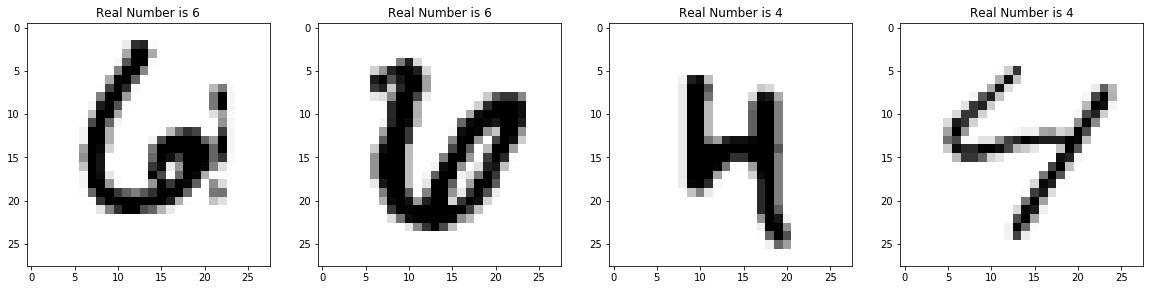

In [12]:
# data visualization
X_train__ = X_train.reshape(X_train.shape[0], 28, 28)

fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train__[i], cmap='binary')
    digit = Y_train[i].argmax()
    ax.set(title='Real Number is %s' %digit)

In [13]:
# Normalization
mean = np.mean(X_train)

In [14]:
std = np.std(X_train)

In [15]:
def standardize(x):
    return (x-mean)/std

In [16]:
epochs = 60
batch_size = 64

In [21]:
model = Sequential()

# vgg16
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Dropout(0.5))

model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Flatten())

model.add(BatchNormalization())

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
          

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [22]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False)

In [23]:
train_gen = datagen.flow(X_train, Y_train, batch_size=batch_size)
test_gen = datagen.flow(X_test, Y_test, batch_size=batch_size)

In [ ]:
# Model Training
history = model.fit_generator(train_gen, 
                epochs=epochs, 
                steps_per_epoch=X_train.shape[0]//batch_size,
                validation_data=test_gen,
                validation_steps=X_test.shape[0]//batch_size)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/60
525/525 [==============================] - 740s 1s/step - loss: 0.5055 - acc: 0.8645 - val_loss: 0.3102 - val_acc: 0.9355
Epoch 2/60
525/525 [==============================] - 639s 1s/step - loss: 0.2190 - acc: 0.9550 - val_loss: 0.2499 - val_acc: 0.9475
Epoch 3/60
525/525 [==============================] - 619s 1s/step - loss: 0.1870 - acc: 0.9628 - val_loss: 0.1680 - val_acc: 0.9639
Epoch 4/60
525/525 [==============================] - 1020s 2s/step - loss: 0.1749 - acc: 0.9654 - val_loss: 0.1252 - val_acc: 0.9783
Epoch 5/60
525/525 [==============================] - 5411s 10s/step - loss: 0.1492 - acc: 0.9715 - val_loss: 0.2443 - val_acc: 0.9663
Epoch 6/60
525/525 [==============================] - 633s 1s/step - loss: 0.1478 - acc: 0.9731 - val_loss: 0.1685 - val_acc: 0.9614
Epoch 7/60
525/525 [==============================] - 11574s 22s/step - loss: 0.1884 - acc: 0.9644 - val_

In [ ]:
model.save("./models/model_keras_vgg16.h5")

In [ ]:
pred = model.predict_classes(test_x, verbose=1)

In [ ]:
sub = pd.read_csv('./data/sample_submission.csv')
sub['Label'] = pred
sub.to_csv("./results/VGG16_keras_sub.csv", index=False)
sub.head(5)

In [ ]:
res = pd.read_csv('./result.csv')

In [ ]:
res.head(5)

In [ ]:
print("sub shape is: " + str(sub.shape))

In [ ]:
print('res shape is: ' + str(res.shape))